# Graph Lab

## Header information:

  - Author #1: Sevhena Walker (walkes31@mcmaster.ca)
  - Author #2: Mohamad-Hassan Bahsoun (bahsounm@mcmaster.ca)
  - Gitlab URL: https://gitlab.cas.mcmaster.ca/walkes31/l1-graph-lab
  - Avenue to Learn group name: graph-52

#### **Graph loaded from the CSV files**

In [1]:
from LondonGraphBuilder import LondonGraphBuilder
from graph import Graph

graph = Graph(LondonGraphBuilder())

#### **Metric Calculations**

In [2]:
from MetricExtractor import *

1. Number of Nodes

In [3]:
numNodes(graph)

302

2. Number of Edges

In [4]:
numEdges(graph)

406

3. Average Node Degree

In [5]:
avgDegree(graph)

2.6887417218543046

#### **Plotting the Node Distribution**

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def graphDistribution(graph):
    degreeDist = degreeDistribution(graph)

    sortedDict = {k: degreeDist[k] for k in sorted(degreeDist)}

    x = np.array(list(sortedDict.keys()))
    y = np.array(list(sortedDict.values()))

    plt.bar(x,y)

    plt.title("Node Degree Distribution")
    plt.xlabel("Degree")
    plt.ylabel("Num of Nodes")

    plt.show()

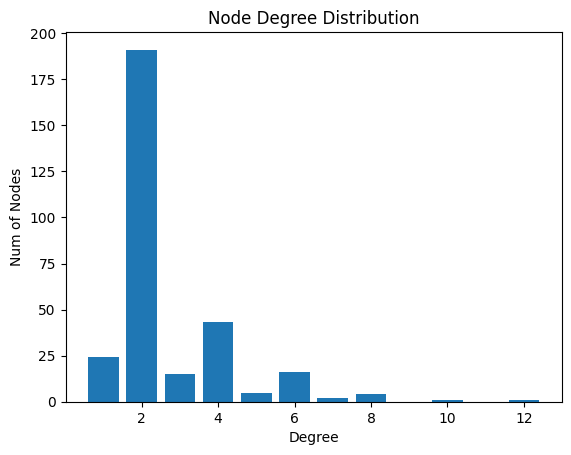

In [7]:
graphDistribution(graph)

#### **Benchmarks**

1. Execution Time
2. Memory

In [8]:
import time
from Dijkstra import Dijkstra
from AstarAlgo import AstarAlgo

start = 303
end = 5

start_time = time.time()

dijkstra = Dijkstra(graph, start)
dijkstra.pathTo(end)

end_time = time.time()

print("Dijkstra : ",(end_time-start_time)*1000)

start_time = time.time()

astar = AstarAlgo(graph, start)
astar.pathTo(end)

end_time = time.time()

print("A star : ",(end_time-start_time)*1000)

Dijkstra :  4.000425338745117
A star :  13.999223709106445


In [11]:
from benchTests import main

main()

151
67
astar 5.999326705932617
(5701, 30965)
dijkstra 2.9990673065185547
(1752, 12920)


The KPI’s that we are measuring to check the performance of our algorithms is time and memory. The benchmark cases in which we are measuring include the following as the station inputs:
- The same stations
- No stations
- The stations who are furthest from each other
- Stations on different lines

We were given the task of finding the shortest path that one needs to take to get from one station to the next. There are two algorithms that we used to do this. The algorithms that we used were Dijkstra’s and A*. Now both algorithms are very similar, but A* uses an additional heuristic to determine which nodes to use. The general idea for both is to use the weights of the edges to find a path that uses the least amount of total weight. A* adds an additional heuristic which helps save time, and memory compared to that of Dijkstra. The heuristic is that we pick the next station to move to based on an ‘f’ value. This ‘f’ values are a combination of the cost it takes to move from the starting station to the next station, and the distance from a given station to the destination station.  With these 2 together we can more accurately choose the best and shortest path to get to the destination station. This saves time and money because there is no need to check every single station then make a final decision like Dijkstra.

After running our benchmarks, we found that when it came to going from the same stations and no stations, the execution times and memory usage were almost identical. When looking at the stations that are the furthest from each other we found that even though theoretically the A* algorithm should be faster and use less memory than Dijkstra, Dijkstra was still faster. This might be due not using a priority queue for the A* or simply having to small of a dataset for A* usefullness to emerge.

*Dijkstra's Algorithm code was heavily inspired by the code given in the Algorithms 4 Edition by Robert Sedgewick*

*The A star algoritm code was heavily inspired by the following website:* https://www.pythonpool.com/a-star-algorithm-python/ 


#### **Subway Patrol Planning**

In [9]:
from Itinerary import Itinerary

import random

itinerary = Itinerary(graph)

#circle = random.sample(range(1,303),10)
circle = [250,48,126,60,151,49,87,44,13]
#circle = [11,55]

circlePath = itinerary.shortestCycle(circle)

stationCount = 0

for edge in circlePath:
    stationCount += 1
    print("<" + edge.start.name + "(", edge.start.id, ")" + ">\t\t","to\t", "<" + edge.to.name + "(", edge.to.id, ")" + ">")

print("Edges:", len(circlePath), "Station Count:", stationCount)

49
151
60
126
48
250
13
44
16
<Embankment( 87 )>		 to	 <Charing Cross( 49 )>
<Charing Cross( 49 )>		 to	 <Leicester Square( 151 )>
<Leicester Square( 151 )>		 to	 <Covent Garden( 60 )>
<Covent Garden( 60 )>		 to	 <Holborn( 126 )>
<Holborn( 126 )>		 to	 <Chancery Lane( 48 )>
<Chancery Lane( 48 )>		 to	 <St. Paul's( 250 )>
<St. Paul's( 250 )>		 to	 <Bank( 13 )>
<Bank( 13 )>		 to	 <Liverpool Street( 156 )>
<Liverpool Street( 156 )>		 to	 <Aldgate( 2 )>
<Aldgate( 2 )>		 to	 <Tower Hill( 263 )>
<Tower Hill( 263 )>		 to	 <Monument( 166 )>
<Monument( 166 )>		 to	 <Cannon Street( 44 )>
<Cannon Street( 44 )>		 to	 <Mansion House( 161 )>
<Mansion House( 161 )>		 to	 <Blackfriars( 25 )>
<Blackfriars( 25 )>		 to	 <Temple( 255 )>
<Temple( 255 )>		 to	 <Embankment( 87 )>
Edges: 16 Station Count: 16


The subway patrol version of the travelling salesman works using Dijkstra. We utilized a simple approach to find the shortest path to all nodes by finding the patrol officer's "base" station at random and then running dilstra from the start point to the nearest station out of all the given stations. This was done repeatedly, each nearest station becoming the start point, until all stations were visited. This approach is very narrow minded however and only ever considers the next nearest station without considering all the stations as a whole. It is possible for this algorithm to miss shorter paths.

#### **Urban Planning**

In [10]:
from UrbanPlanning import UrbanPlanning

up = UrbanPlanning(graph)
print(up.islandPath(4,200))

[4, 201, 27, 79, 43]


London’s network is organized into different zones, and transportations islands. A transportation island is a group of stations in a particular zone that are not connected to any other transpiration islands in that zone. We added a library that identifies how the transportation islands are connected, and how to get from one island to another given any 2 stations. To first identify the transportation island amongst the zones is we run an algorithm called connected components. Using this we can check first whether a station belongs to a certain zone, and then add it to the island that it belongs to. To achieve a path from one island to another for example let’s say we want to get to station 40’s island from stations 11’s island. The first thing we check is if these two stations are already on the same island, because if they are then there is nothing that needs to be done. If the 2 stations are not on the same islands, then we run A* algorithm to get the shortest path from station 11 to 40. Then we iterate through this path checking each station and the island it belongs to, if the station is part of the island we are looking for, then we return the path from the beginning to that first station we find that belongs to the same island. Now the reason we do that is because we want to return a path that is not subsumed by any other path.

#### UML Diagram

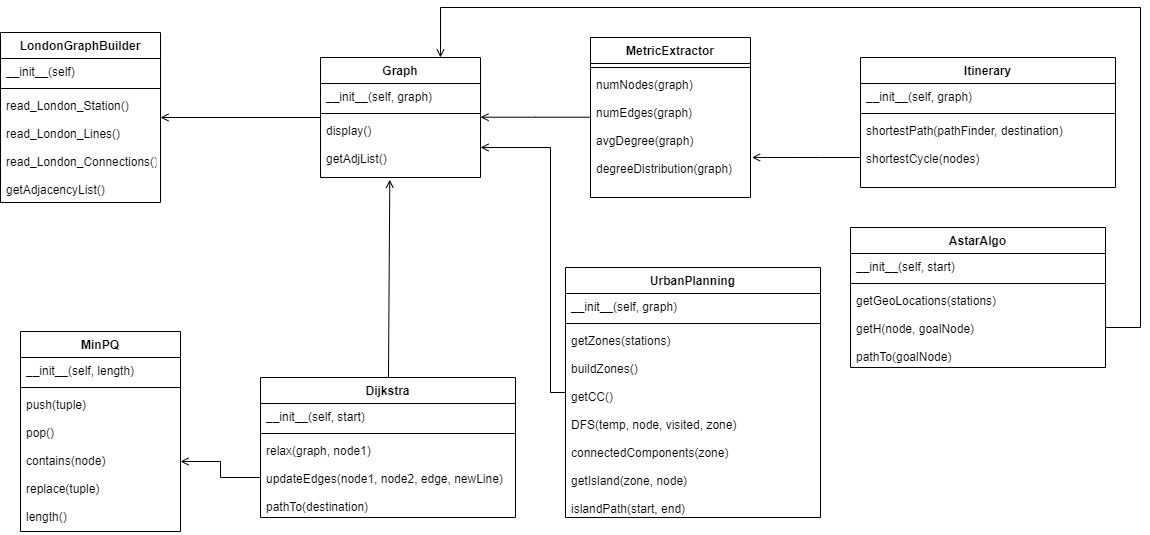

**Workload**

We mostly split teh work equally, Hassan did the graph and part of the metrics as well as the A* algoritm and the urban planning problem. Sevhena did the graph extractor, the Dijkstra algoritm and the subway patrol planning.

## **Self Reflection**

**Mohamad-Hassan Bahsoun**

Backward
- I have not done similar kind of work in the past. But it was really nice to do work of this kind because it allowed me to apply the theory that I’ve spent the last couple of years learning to actual practice. It was nice to work with a large amount of data aswell, becasue this allowed me to experience a bit of what it is going to looke like in the future. I have never really done any benchmarks or testing before this so exploring this area was challeneging but exciting.

Inward
- I feel good about the piece of work that we handed in. I feel as though it does what is intended, and it is very organized. I really like that it is organized and that we made use of SOLID principles, because this allows us to change, and add new code without having to impact the rest of the code. I wouldn’t say that I really dislike anything rather, when I look at the code that I made, I do wish, and think that with more time I could have made them more efficient.

Outward
- The one thing I want people to particularly notice about our work is the organization and the use of the SOLID principles. This I beleive is really important for good, and effieicent code. Everything is organized into different modules, there is commenting, and everything major has its own file, as to not mess up anything else.

Forward
- If I had to do this project again, I would make my code more efficient. I feel as though there are some things that could’ve been done better which would result in faster, less memory usage code.


**Sevhena Walker**

*Backward*

- This would be my first time actually trying to build a softwre project from scratch. Up until now, I have mostly focused on the coding aspect of software. This was a first attempt at actual engineering for me.

*Inward*

- I am somewhat displeased with it. I feel as though I got a little bit overwhelmed, by how much I didn't know. It's difficult to keep the momentum going when you are running into so many different unknowns that you don't necessarily have the immediate knowledge to resolve. With more exposure and guidance with this type project, I think I could do much better.

*Outward*

- I always try to be meticulous and pay attention to detail. At the very least that is what I aim for. Being thorough is something I find important and hopefully it will start to show as I gain more expertise.

*Forward*

- If I were to start again, I would spend much more time planning and simply documenting what I wish to acheive rather than simply jumping into the coding. Since the programming was what I was most familiar with, that is more or less what I started with without having done much thorough planning.